Comparison of GF and SPF 8w Female to GF 8w Female with added microbiota (young (GFyM) or old (GFoM))

# Loads libraries and functions

In [1]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [2]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [3]:
source("functions.R")

# Get the data

In [192]:
# Load the count table
original_counts = read.table("../data/counts.tabular", sep="\t", header = 1, row.names=1)
col_to_conserve = c(grep("SPF_8w_F_+", colnames(original_counts), perl=TRUE, value=TRUE),
                    grep("GF_8w_F_+", colnames(original_counts), perl=TRUE, value=TRUE))
added_microbiota_counts = read.table("../data/added_microbiota_counts.tabular", sep="\t", header = 1, row.names=1)
counts = cbind(added_microbiota_counts, original_counts[rownames(added_microbiota_counts),col_to_conserve])
head(counts)

,GFyM_8w_F_1_2,GFyM_8w_F_3_2,GFyM_8w_F_2_2,GFoM_8w_F_3_2,GFoM_8w_F_2_2,GFoM_8w_F_1_2,SPF_8w_F_1_2,SPF_8w_F_2_2,SPF_8w_F_3_2,SPF_8w_F_4_2,SPF_8w_F_5_2,GF_8w_F_1_2,GF_8w_F_2_2,GF_8w_F_3_2,GF_8w_F_4_2,GF_8w_F_5_2
0610005C13Rik,13,8,7,4,0,11,3,3,2,2,0,17,0,2,5,0
0610007P14Rik,430,725,654,621,665,678,654,152,705,698,891,837,627,605,563,631
0610009B22Rik,829,1088,877,904,1136,956,1087,436,1103,996,1346,969,938,1128,911,853
0610009L18Rik,79,102,114,122,100,114,36,22,43,79,67,45,18,11,43,19
0610009O20Rik,246,224,279,199,213,217,235,204,239,175,172,216,146,268,289,210
0610010B08Rik,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Remove the columns with spurious data

In [193]:
to_remove = c("SPF_8w_F_2_2", "SPF_8w_F_5_2")
counts = counts[,!names(counts) %in% to_remove]

Remove the rows with only zeros

In [194]:
nrow(counts)
counts = counts[ rowSums(counts) > 1, ]
nrow(counts)

[1] 24421

[1] 16487

Extract the metadata

In [195]:
metadata = t(sapply(sapply(colnames(counts), strsplit, split = "_"), unlist))
short_names = paste(metadata[,1], metadata[,2], metadata[,3], metadata[,4], sep ="_")
names(short_names) = rownames(metadata)
metadata = metadata[,-5]
colnames(metadata) = c("type", "age", "gender", "replicate")
metadata = as.data.frame(metadata)
metadata$project = NULL
metadata[metadata$type == "GFyM",'project'] = "S304"
metadata[metadata$type == "GFoM",'project'] = "S304"
metadata[metadata$type == "SPF",'project'] = "S225"
metadata[metadata$type == "GF",'project'] = "S225"
metadata

,type,age,gender,replicate,project
GFyM_8w_F_1_2,GFyM,8w,F,1,S304
GFyM_8w_F_3_2,GFyM,8w,F,3,S304
GFyM_8w_F_2_2,GFyM,8w,F,2,S304
GFoM_8w_F_3_2,GFoM,8w,F,3,S304
GFoM_8w_F_2_2,GFoM,8w,F,2,S304
GFoM_8w_F_1_2,GFoM,8w,F,1,S304
SPF_8w_F_1_2,SPF,8w,F,1,S225
SPF_8w_F_3_2,SPF,8w,F,3,S225
SPF_8w_F_4_2,SPF,8w,F,4,S225
GF_8w_F_1_2,GF,8w,F,1,S225


# Exploratory analysis and visualization


In [196]:
dds = DESeqDataSetFromMatrix(
        countData = counts,
        colData = metadata,
        design = ~ type)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

Regularized-logarithm transformation

In [197]:
rld = rlog(dds, blind = FALSE)

Sample distances

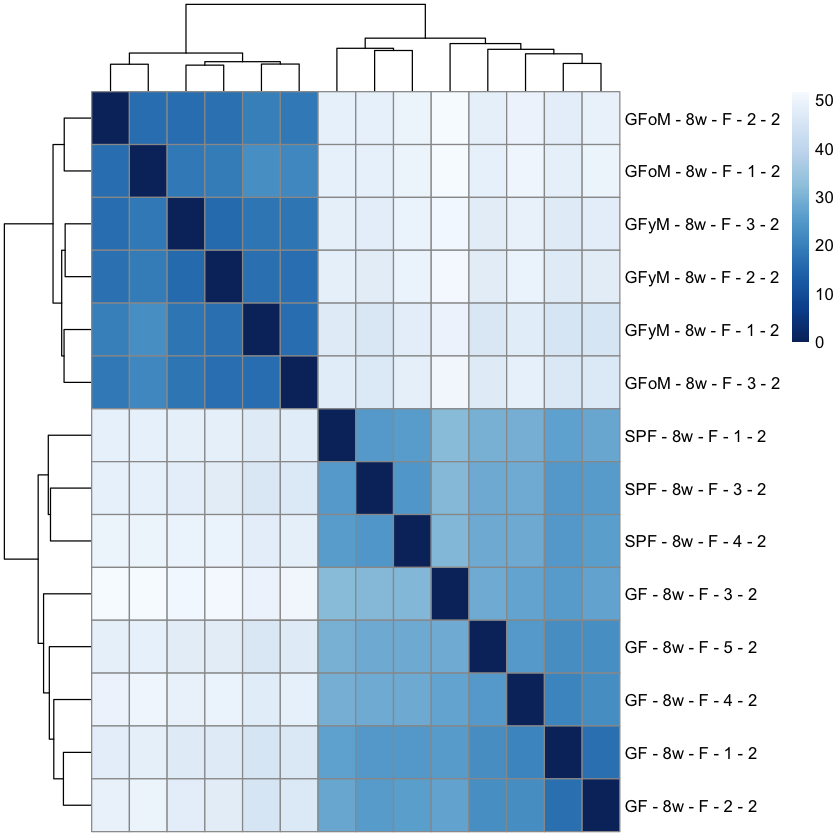

In [225]:
sampleDists = dist(t(assay(rld)))
sampleDistMatrix =  as.matrix( sampleDists )
rownames(sampleDistMatrix) = gsub("_", " - ", rownames(sampleDistMatrix))
colnames(sampleDistMatrix) = NULL
colors =  colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

PCA plot

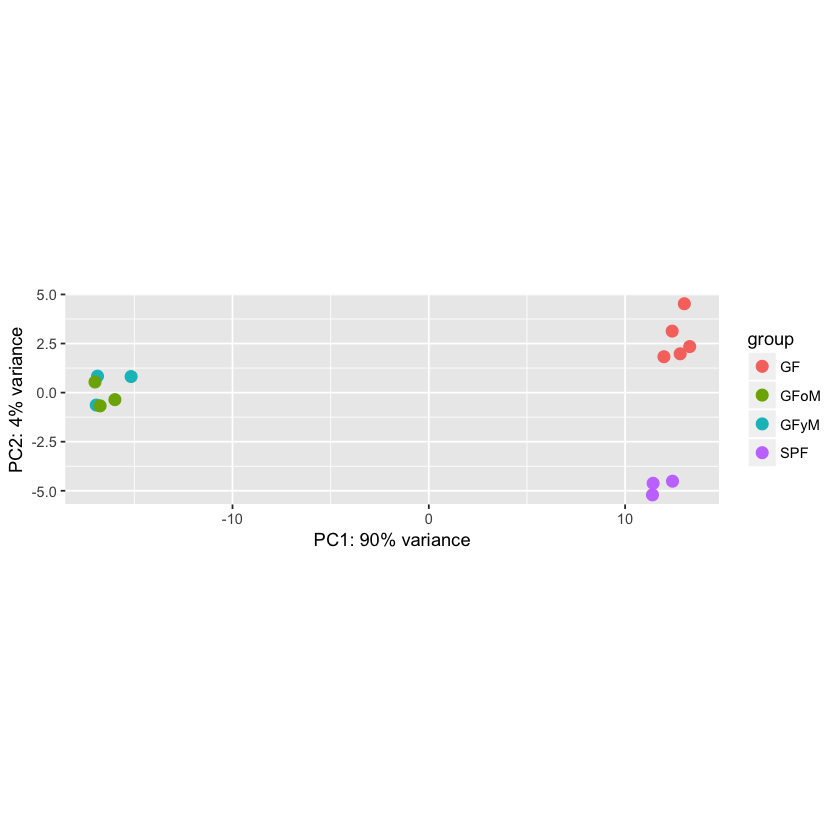

In [199]:
plotPCA(rld, intgroup = "type")

# Removing batch effect

PCA on the regularized-logarithm transformation

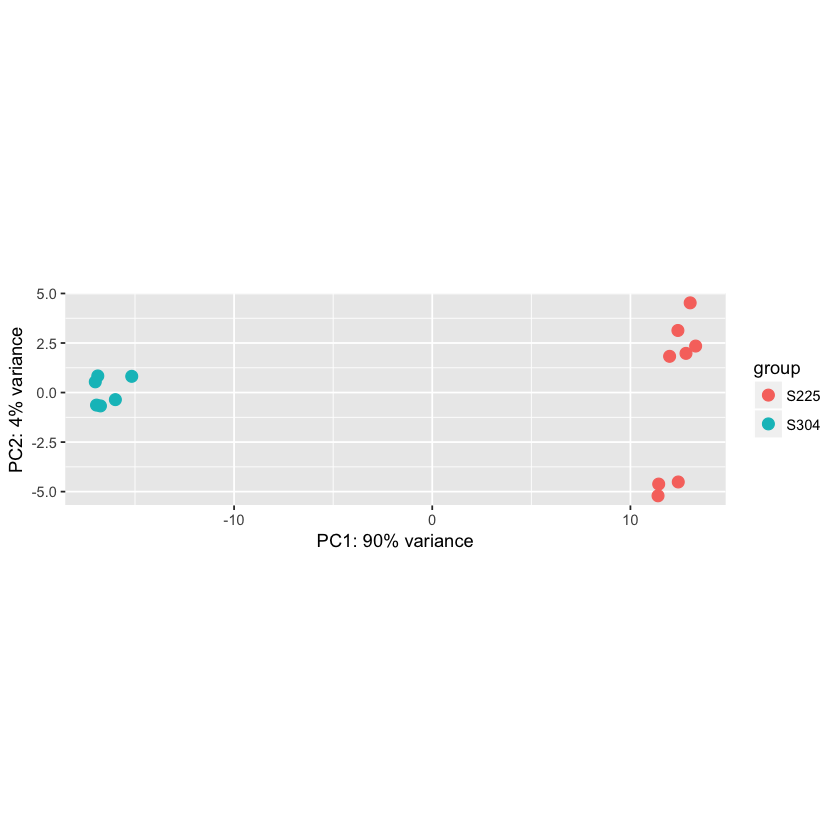

In [200]:
plotPCA(rld, intgroup = "project")

Adjust for the project using Combat

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


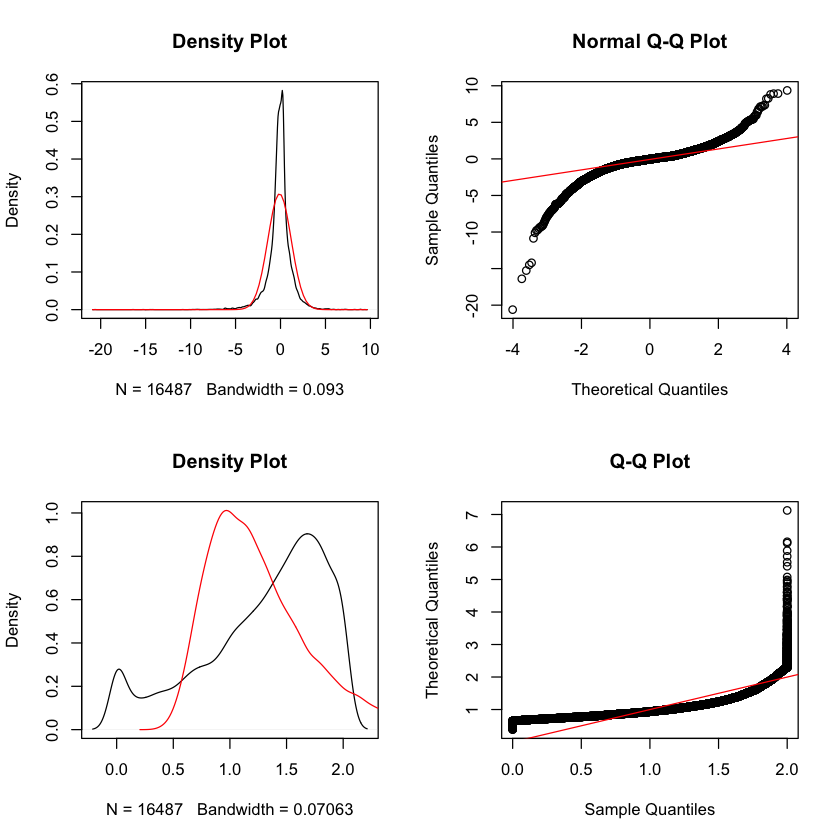

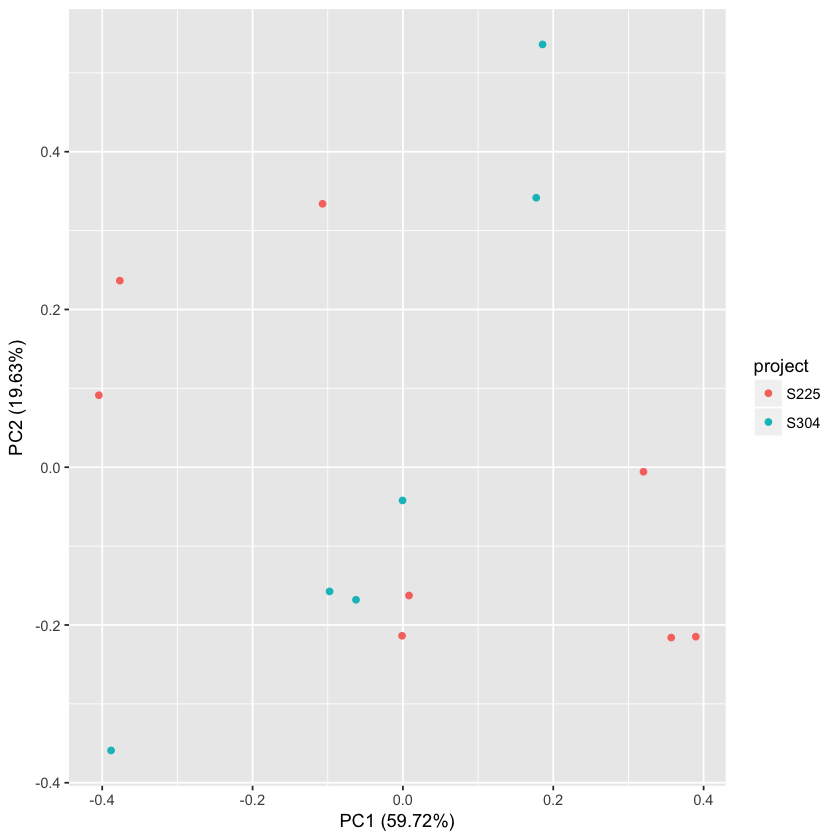

In [203]:
dds_size = estimateSizeFactors(dds)
norm_counts = counts(dds_size, normalized = TRUE)
batch = metadata$project
modcombat = model.matrix(~1, data=metadata)
combat_data = ComBat(dat=norm_counts, batch=batch, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)
pca_data = t(combat_data)
pca_data = pca_data[rownames(metadata),]
autoplot(prcomp(pca_data), data = metadata, colour = 'project')

Adjust for the project using limma

In [205]:
corrected_rld = rld
assay(corrected_rld) = limma::removeBatchEffect(assay(corrected_rld), corrected_rld$project)

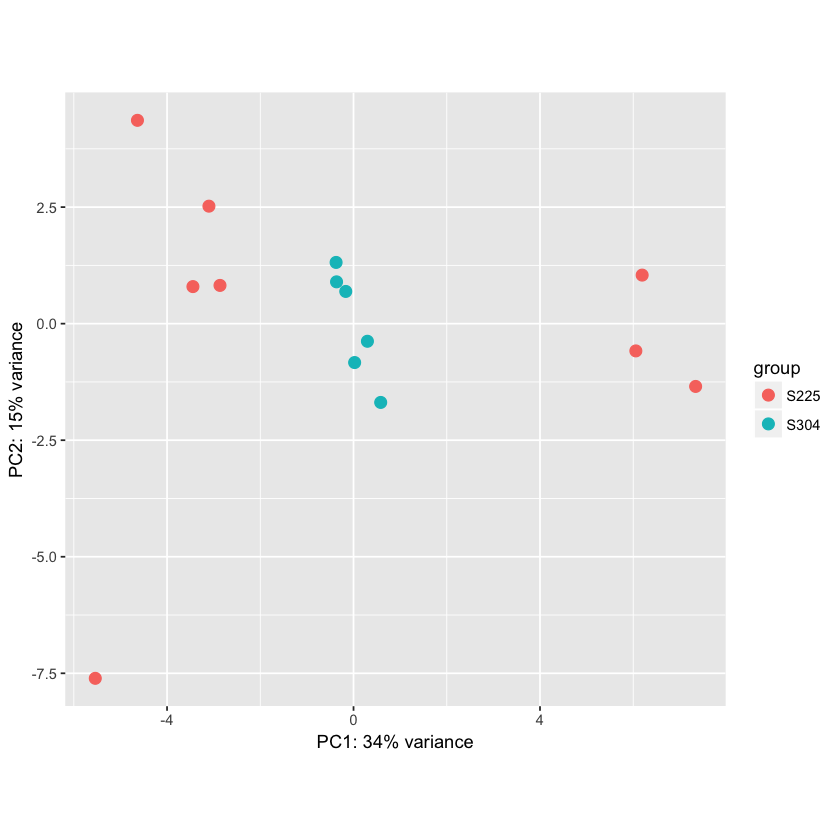

In [226]:
plotPCA(corrected_rld, "project")

# Visualization

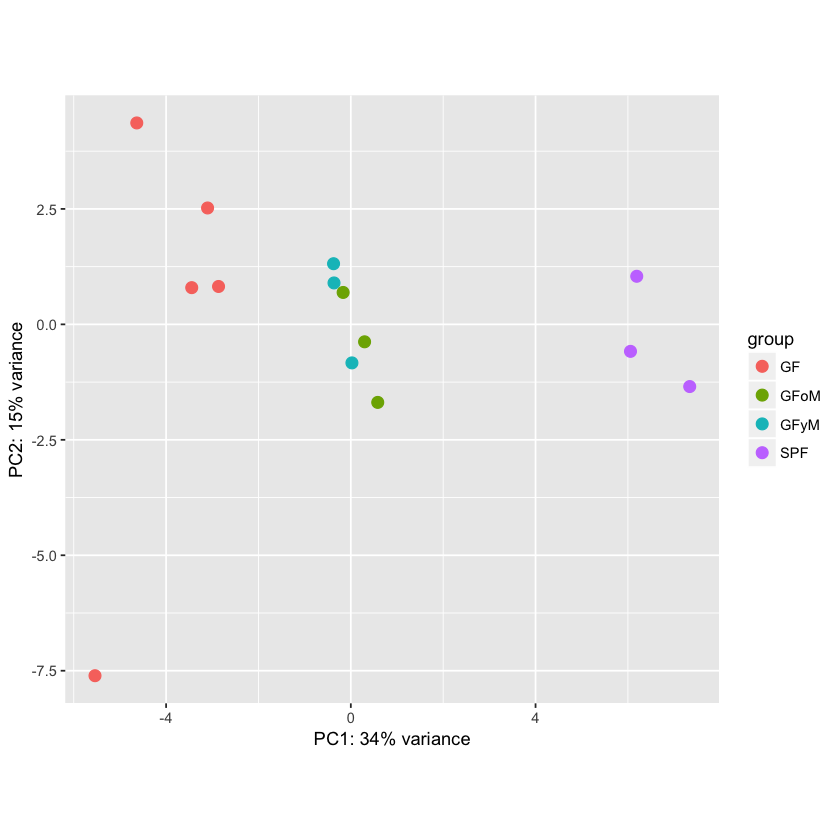

In [227]:
plotPCA(corrected_rld, intgroup = "type")

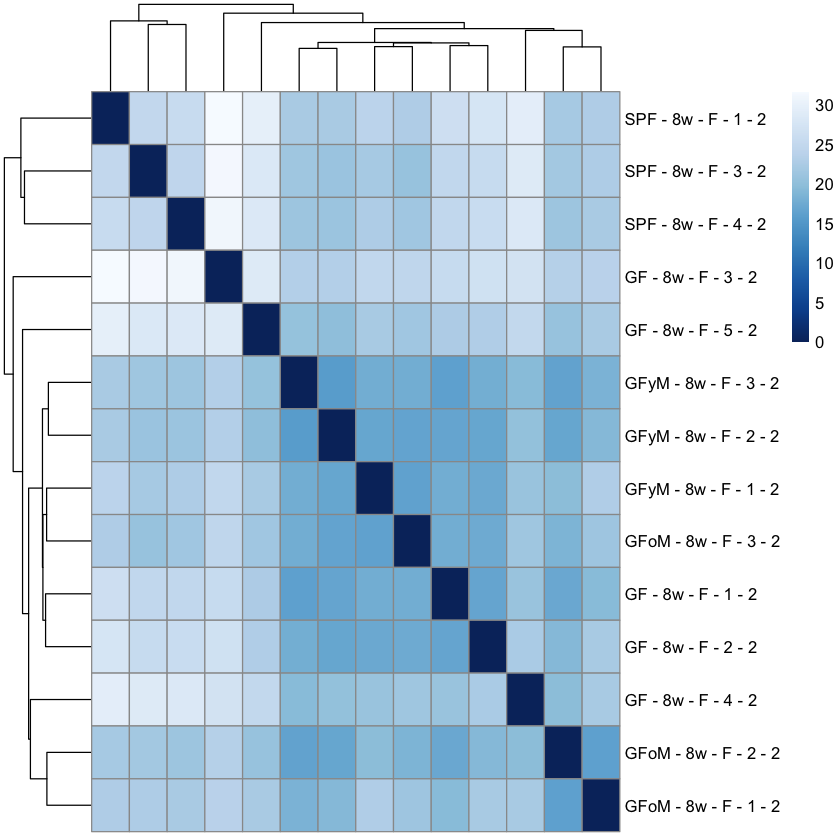

In [224]:
sampleDists = dist(t(assay(corrected_rld)))
sampleDistMatrix =  as.matrix( sampleDists )
rownames(sampleDistMatrix) = gsub("_", " - ", rownames(sampleDistMatrix))
colnames(sampleDistMatrix) = NULL
colors =  colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)